# Exercise Notebook

This notebook will guide you through using Python libraries to analyse a data set, visualize relevant information, and build a predictive model.

### General how-to:

- Your files are visible on the right in the **File Browser** tab. You can even open the data files.
- Change to the <img src="https://img.icons8.com/material-outlined/344/list.png" width=15 height=15 /> tab to see the **table of contents** for the notebook. Now you jump between sections/exercises if you need to.
- Every exercise has an **answer cell** for you to write your answer in (`# your code here`). There is an ellipsis (**...**) wherever you need to complete a command.
- Every exercise has a cell with a correct solution. The **solution cell** is collapsed and not visible until you click on the ellipsis symbol <img src="https://img.icons8.com/ios-filled/344/ellipsis.png" width=20 height=15 />  below the answer cell. After checking your solution, you can collapse the cell again by clicking on the blue vertical line on the right.
- If you can't think of the solution immediately, you have **a few options**:
    - Trial and error (best option)
    - Google search (e.g. 'pandas replace nan values')
    - Copy from the intro notebook (easiest, but might fail sometimes)


In [23]:
# Importing the most important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

In [2]:
# Table formatting

from IPython.display import display, HTML
display(HTML("<style>.container { width:60% !important; margin: 0 auto; }}</style>"))

<img src="https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png" width=2000/>

## 1. Features

The data you will work with consists of Portuguese students' profiles and their language course marks. [Source](https://www.kaggle.com/datasets/impapan/student-performance-data-set).  [License](https://creativecommons.org/licenses/by/4.0/)

There are 30 attributes, or **features**, available per student:

Feature ID| Feature Name |Description | Type | Values
--|-----|-----|----|---
1 | school | school name | binary | "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira
2 | sex | student's sex | binary | "F" - female or "M" - male
3 | age | student's age | numeric| from 15 to 22
4 | address | home address type | binary | "U" - urban or "R" - rural
5 | famsize | family size | binary | "LE3" - less or equal to 3 or "GT3" - greater than 3
6 | Pstatus | parent's cohabitation status | binary| "T" - living together or "A" - apart
7 | Medu | mother's education |numeric | 0 - none,  1 - 4th grade, 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education
8 | Fedu | father's education |numeric | 0 - none,  1 - 4th grade, 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education
9 | Mjob | mother's job area |categorical | "teacher", "health", "services" (e.g. administrative or police), "at_home" or "other"
10 | Fjob | father's job area |categorical | "teacher", "health", "services" (e.g. administrative or police), "at_home" or "other"
11 | reason | reason to choose this school | categorical | close to "home", school "reputation", "course" preference or "other"
12 |guardian | student's guardian | categorical | "mother", "father" or "other"
13 |traveltime | home to school travel time |numeric| 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour
14 |studytime | weekly study time | numeric| 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours
15 |failures | number of past class failures |numeric| n if 1<=n<3, else 4
16 |schoolsup | extra educational support |binary| yes or no
17 |famsup | family educational support |binary| yes or no
18 |paid | extra paid classes in Math |binary| yes or no
19 |activities| extra-curricular activities |binary| yes or no
20 |nursery | attended nursery school|binary| yes or no
21 |higher | wants to take higher education |binary| yes or no
22 |internet | Internet access at home |binary| yes or no
23 |romantic | with a romantic relationship |binary| yes or no
24 |famrel | quality of family relationships |numeric| from 1 - very bad to 5 - excellent
25 |freetime | free time after school |numeric| from 1 - very low to 5 - very high
26 |goout | going out with friends |numeric| from 1 - very low to 5 - very high
27 |Dalc|  workday alcohol consumption |numeric| from 1 - very low to 5 - very high
28 |Walc|  weekend alcohol consumption |numeric| from 1 - very low to 5 - very high
29 |health | current health status |numeric| from 1 - very bad to 5 - very good
30 |absences | number of school absences |numeric| from 0 to 93



## 2. Target variables

Target variables are what we want to predict, using the features defined above. They are also called labels.

In our data set, we have three target variables given, which represent the students' marks in the first term, second term and the final mark. 

Feature ID| Feature Name |Description | Type | Values
--|-----|-----|----|---
31 | G1 | first term grade | numeric | from 0 to 20
32 | G2 | second term grade | numeric | from 0 to 20
33 | G3 | final grade | numeric | from 0 to 20

In reality, the target variables are something arbitrary. For example in this data set, we could also try predicting any one of the features, for example whether the student wants to go to university (feature `higher`) or not.

<img src="https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png" width=2000/>

## 3. Data Loading and Basic Statistics

### 3.1. **Exercise:** Loading the data

Load the data from the given `csv` file and print it.

In [8]:
# your code here

data_path = 'Data/student-por.csv'

student_data = pd.read_csv(data_path)

In [9]:
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,NaN,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,NaN,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,NaN,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### 3.2. **Exercise:** Data summary

Print a summary of the dataset's columns along with data types and memory usage.

In [ ]:
# your code here

student_data.info()

student_data.info()

### 3.3. **Exercise:** Feature statistics

Print a (separate) statistical summary for the columns `reason` and `G3`. 

- Why are the outputs different? 
- Write some notes/speculate about what you see (if you want).

In [26]:
# your code here - reason

student_data['reason'].describe()

count        649
unique         4
top       course
freq         285
Name: reason, dtype: object

In [27]:
# your code here - G3

student_data['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

- Different count
- Mean grade is 11.9
- ...


-------------

### 3.4. **Exercise:** Feature distributions

Visualize the feature distributions for the feature `reason` and the target `G3`.
 - Use a count plot for `reason` and a histogram plot (optionally with KDE) for `G3`. 

<AxesSubplot:xlabel='reason', ylabel='count'>

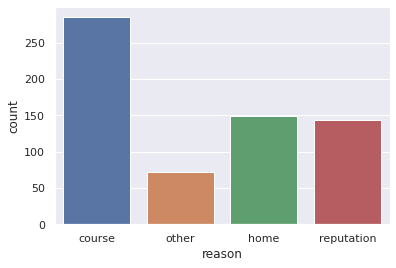

In [28]:
# your code here

sns.countplot(data=student_data, x='reason')

<AxesSubplot:xlabel='G3', ylabel='Count'>

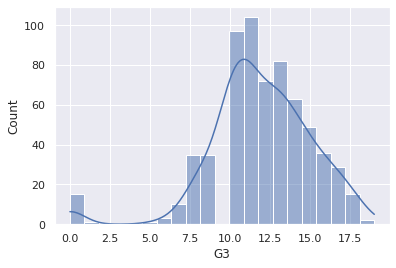

In [29]:
# your code here

sns.histplot(data=student_data, x='G3', kde=True)

Feel free to plot some other features - just insert some cells below and have fun with it :)

-----------------------

## 4. Data Exploration

In this section you will try out different visualizations to represent the data. 
The exercises are stated as questions to give you an idea of the flexibility of data analysis.

### **Exercise:** Performance per school

**Do students from one school have higher grades (`G3`) on average than students of the other school?**

- Use a box plot or a violin plot to answer the question.
- Advanced: Separate students by gender as well, using the `hue=` parameter.

<AxesSubplot:xlabel='school', ylabel='G3'>

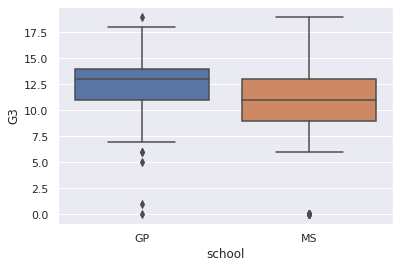

In [32]:
# your code here

sns.boxplot(data=student_data, x="school", y="G3")

### **Exercise:** Relationship status

**Does being in a relationship affect a student's grades?**

- Use a box plot or a violin plot to answer the question.
- Advanced: Separate students by gender as well, using the `hue=` parameter.

<AxesSubplot:xlabel='romantic', ylabel='G3'>

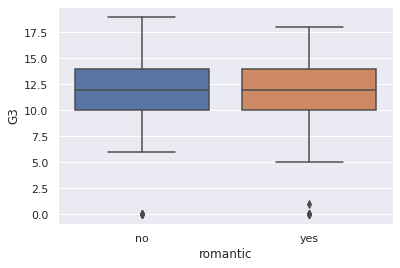

In [33]:
# your code here

sns.boxplot(data=student_data, x="romantic", y="G3")

### **Exercise:** Failures

**How does the expected performance change depending on the number of previous failures?**

- Use a [point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html) to better see the general trend or a [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) to compare distributions in detail.
- Advanced: Separate students by school as well, using the `hue=` parameter. Set `dodge=True` or `split=True` for better visibility.

<AxesSubplot:xlabel='failures', ylabel='G3'>

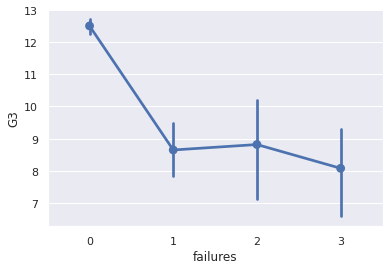

In [51]:
# your code here

sns.pointplot(x='failures', y='G3', data=student_data)

In [118]:
student_data.to_csv('Data/student/student-por.csv', index=False)

In [6]:
student_data['was_absent'] = np.where(student_data['absences'] > 3, 'yes', 'no')

In [7]:
student_data[['was_absent']].value_counts()

was_absent
no            373
yes           276
dtype: int64

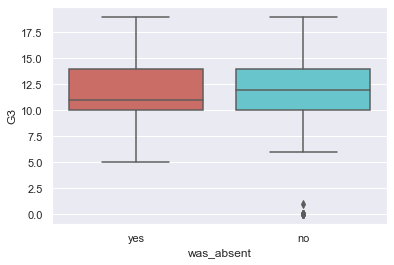

In [9]:
sns.boxplot(data=student_data, x="was_absent", y="G3", palette='hls')
plt.show()

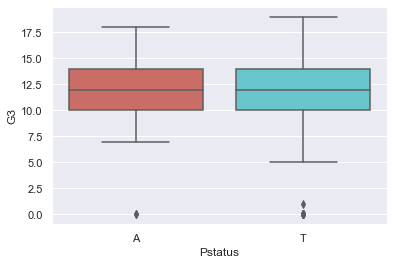

In [10]:
sns.boxplot(data=student_data, x="Pstatus", y="G3", palette='hls')
plt.show()

In [12]:
student_data = student_data.drop('absences', axis=1)

In [6]:
orig_data['romantic'].dtype == 'object'

True

In [14]:
tmp_data = orig_data.copy()

categorical_features = [feature_name for feature_name in tmp_data.columns if tmp_data[feature_name].dtype == 'object']

for cf in categorical_features:
    tmp_data = pd.concat([tmp_data, pd.get_dummies(tmp_data[cf], prefix=cf, drop_first=True)], axis=1)

In [15]:
tmp_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,was_absent_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,1,0,0,0,1,1,0,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,1,0,0,0,1,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,1,0,0,0,1,1,1,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,0,1,0,1,1,1,1,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,0,0,0,0,1,0,1,1,0,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,0,0,1,0,0,1,1,1,0,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,0,0,0,0,1,1,1,0,0,1
647,MS,M,17,U,LE3,T,3,1,services,services,...,0,0,0,0,0,0,1,1,0,1


In [16]:
numerical_data = tmp_data.drop(categorical_features, axis=1)
numerical_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,was_absent_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,1,1,0,0,1
1,17,1,1,1,2,0,5,3,3,1,...,0,0,1,0,0,0,1,1,0,0
2,15,1,1,1,2,0,4,3,2,2,...,0,1,0,0,0,1,1,1,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,1,1,1,1,1,0
4,16,3,3,1,2,0,4,3,2,1,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,0,0,0,1,0,1,1,0,1
645,18,3,1,1,2,0,4,3,4,1,...,0,0,1,0,0,1,1,1,0,1
646,18,1,1,2,2,0,1,1,1,1,...,0,0,0,0,1,1,1,0,0,1
647,17,3,1,2,1,0,2,4,5,3,...,0,0,0,0,0,0,1,1,0,1


In [17]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  G1                 649 non-null    int64
 13  G2                 649 non-null    int64
 14  G3                 649 non-null    int64
 15  school_MS          649 non-null    uint8
 16  sex_M              649 non-null    uint8
 17  address_U       

In [42]:
correlation = numerical_data.corr()

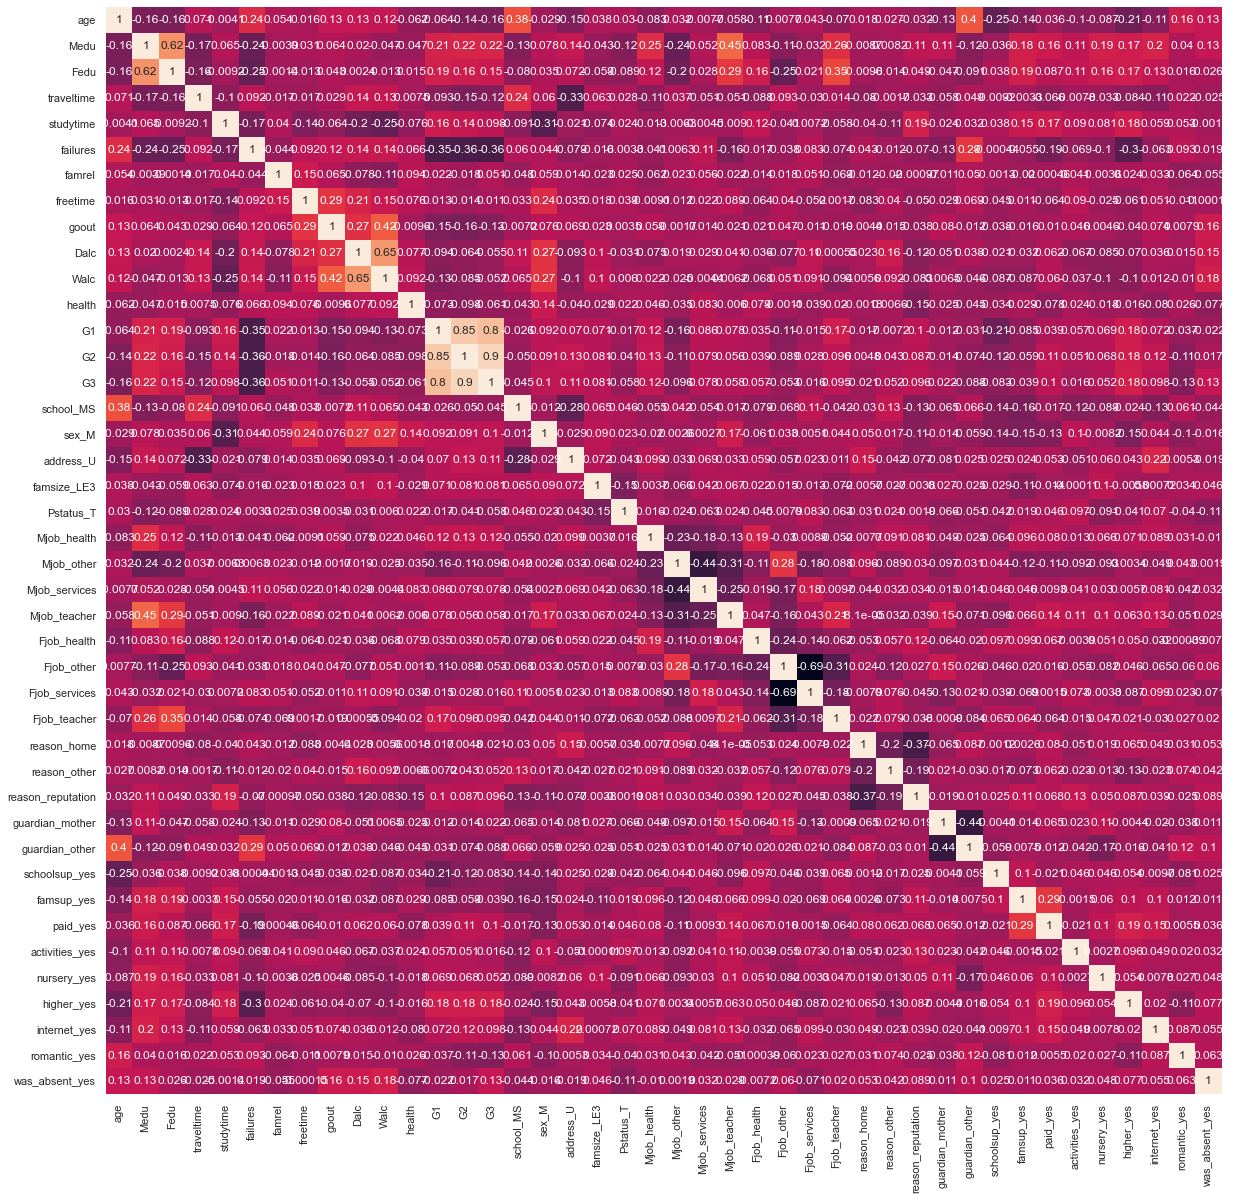

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,   
            annot=True, 
            cbar=False
           )
plt.show()

In [15]:
sns.pairplot(data=numerical_data)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EBFF95CB88> (for post_execute):


KeyboardInterrupt: 

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [19]:
# # Normalization

# normalizer = Normalizer().fit(X_train)

In [77]:
labels = numerical_data[['G1', 'G2', 'G3']]
features = numerical_data.drop(['G1', 'G2', 'G3'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels['G3'], test_size=0.25, random_state=123)

# Cast back to DataFrame
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

In [42]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,was_absent_yes
93,16,4,2,2,2,0,5,3,3,1,...,0,0,1,0,1,1,1,1,0,0
430,16,1,2,1,3,0,4,4,3,1,...,0,1,0,0,0,1,1,1,0,0
196,17,2,4,1,2,0,5,4,2,2,...,0,0,1,0,1,1,1,0,0,0
316,17,2,4,2,2,0,4,3,3,1,...,0,0,1,0,0,1,1,1,1,1
205,17,1,1,1,2,0,5,3,3,1,...,0,0,0,0,1,1,1,1,0,0


In [43]:
X_train = X_train[['failures']]
X_test = X_test[['failures']]

In [38]:
X_train.head()

,failures
93,0
430,0
196,0
316,0
205,0


In [44]:
regr_lr = LinearRegression()
regr_lr.fit(X_train, y_train)
regr_lr.score(X_test[['failures']], y_test)

0.16736619878797798

In [45]:
regr_sv = svm.SVR(kernel="poly", C=1, gamma="auto", degree=1, epsilon=2)
regr_sv.fit(X_train, y_train)
regr_sv.score(X_test, y_test)

0.13788938863901368

In [46]:
regr_dt = DecisionTreeRegressor(random_state=123)
regr_dt.fit(X_train, y_train)
regr_dt.score(X_test, y_test)

0.21942734659443774

In [78]:
regr_rf = RandomForestRegressor(random_state=123)
regr_rf.fit(X_train, y_train)
regr_rf.score(X_test, y_test)

0.3260695698141495

In [26]:
test_labels_and_predictions = pd.DataFrame(y_test, columns=['G3'])
test_labels_and_predictions['prediction_DT'] = regr_dt.predict(X_test)
test_labels_and_predictions['prediction_RF'] = regr_rf.predict(X_test)
test_labels_and_predictions

,G3,prediction_DT,prediction_RF
376,14,13.0,13.53
142,12,12.0,11.73
43,10,10.0,11.25
162,11,11.0,11.31
351,15,12.0,8.96
...,...,...,...
246,13,8.0,11.49
261,13,13.0,12.74
164,10,10.0,8.93
501,13,0.0,11.48


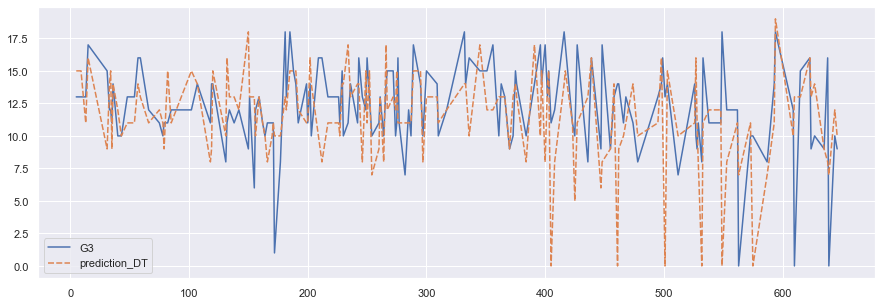

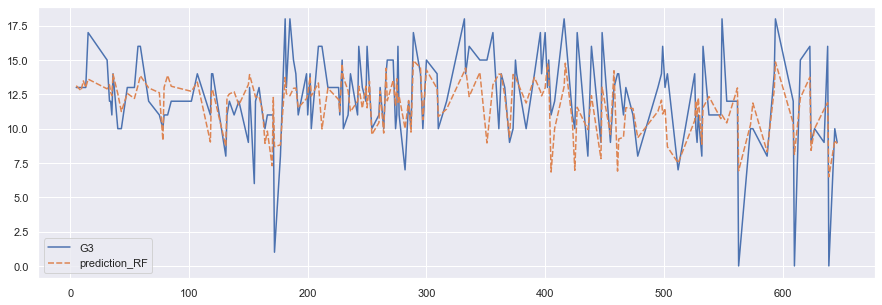

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(data=test_labels_and_predictions[['G3', 'prediction_DT']])
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(data=test_labels_and_predictions[['G3', 'prediction_RF']])
plt.show()

In [101]:
importances = regr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
type(forest_importances)

pandas.core.series.Series

Text(0, 0.5, 'Mean decrease in impurity')

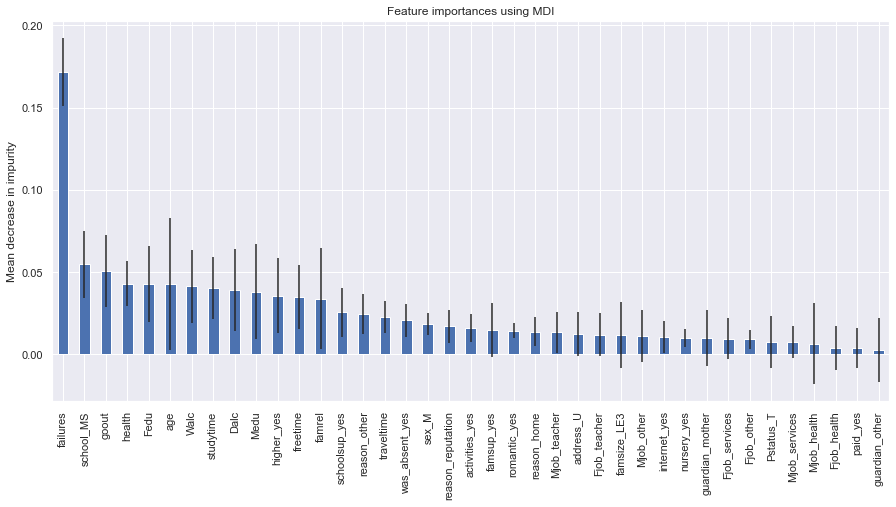

In [102]:


plt.figure(figsize=(15,7))
forest_importances.plot.bar(yerr=std)
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")

## Dimensionality reduction

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(X_train)

X_train_pca = pd.DataFrame(pca.transform(X_train))
X_test_pca = pd.DataFrame(pca.transform(X_test))

X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.857800,2.231102,-0.324393,-0.400086,-1.112494,-0.240525,-0.906167,-0.000795,0.501918,-0.925628,0.100015,1.145497,-0.167230,0.544999,0.190148
1,-2.617399,-2.289781,-1.401451,0.558536,0.674082,-0.370619,-0.352971,0.554434,0.691602,0.145216,0.075004,0.699927,-0.181359,-0.109734,-0.102425
2,-0.296727,-2.952609,-1.076482,-0.240147,0.302096,0.713198,-0.618776,-0.401161,0.425936,-0.691551,-0.225208,0.223303,-0.662751,-0.282031,-0.681882
3,1.281885,-2.636917,-0.947117,-0.134710,-2.214774,0.970554,-0.529354,-0.570647,1.203526,-0.727410,0.893791,0.823976,1.576617,-0.029338,0.077686
4,-1.556277,-0.169661,1.934879,-1.355498,-1.902025,0.341099,-0.197442,-0.617392,0.447763,-0.712940,1.089184,0.456198,-0.080475,0.401092,0.336338


In [82]:
pca.n_components

15

In [83]:
pca.explained_variance_ratio_.sum()

0.83841316906375

In [90]:
regr_rf = svm.SVR()
regr_rf.fit(X_train_pca, y_train)
regr_rf.score(X_test_pca, y_test)

0.1120746426721565

## Useful Links

|Desc||Link|
|---|--|----|
`pandas` Cheat Sheet | https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf